In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(4)

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

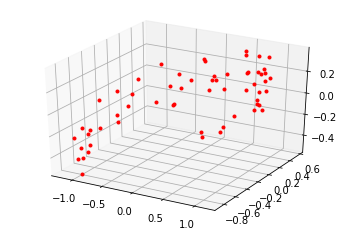

In [ ]:
def plot3D_data(data):
  ax = plt.axes(projection='3d')
  ax.plot3D(data[:,0],data[:, 1], data[:, 2], '.r')

  plt.grid(True)
  plt.show()

plot3D_data(X_train)

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])
autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1.5))

In [ ]:
history = autoencoder.fit(X_train, X_train, epochs=20)

Epoch 1/20
2/2 [==============================] - 0s 5ms/step - loss: 0.2547
Epoch 2/20
2/2 [==============================] - 0s 7ms/step - loss: 0.1032
Epoch 3/20
2/2 [==============================] - 0s 6ms/step - loss: 0.0551
Epoch 4/20
2/2 [==============================] - 0s 6ms/step - loss: 0.0503
Epoch 5/20
2/2 [==============================] - 0s 6ms/step - loss: 0.0839
Epoch 6/20
2/2 [==============================] - 0s 5ms/step - loss: 0.2223
Epoch 7/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0913
Epoch 8/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0320
Epoch 9/20
2/2 [==============================] - 0s 3ms/step - loss: 0.0242
Epoch 10/20
2/2 [==============================] - 0s 6ms/step - loss: 0.0189
Epoch 11/20
2/2 [==============================] - 0s 4ms/step - loss: 0.0142
Epoch 12/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0102
Epoch 13/20
2/2 [==============================] - 0s 6ms/step - loss: 0.

In [ ]:
codings = encoder.predict(X_train)

In [ ]:
output = autoencoder.predict(X_train)

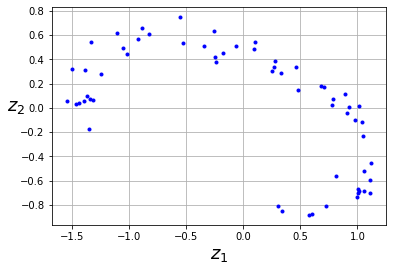

In [ ]:
fig = plt.figure(figsize=(6,4))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

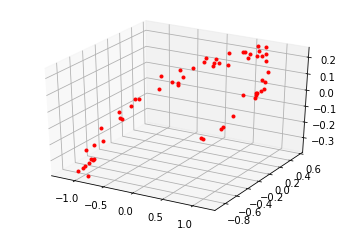

In [ ]:
plot3D_data(output)

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

### stacked auto encoder

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
latent_size = 300
stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(600, activation="selu"),
     keras.layers.Dense(400, activation="selu"),
    keras.layers.Dense(latent_size, activation="selu"),
])

stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(400, activation="selu", input_shape=[latent_size]),
    keras.layers.Dense(600, activation="selu"),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])

stacked_ae.compile(loss="binary_crossentropy",
                   optimizer=keras.optimizers.SGD(learning_rate=1.5), metrics=[rounded_accuracy])
history = stacked_ae.fit(X_train, X_train, epochs=60,
                         validation_data=(X_valid, X_valid))

Epoch 1/60
1719/1719 [==============================] - 21s 12ms/step - loss: 0.3091 - rounded_accuracy: 0.9128 - val_loss: 0.2869 - val_rounded_accuracy: 0.9348
Epoch 2/60
1719/1719 [==============================] - 20s 12ms/step - loss: 0.2804 - rounded_accuracy: 0.9399 - val_loss: 0.2778 - val_rounded_accuracy: 0.9464
Epoch 3/60
1719/1719 [==============================] - 21s 12ms/step - loss: 0.2737 - rounded_accuracy: 0.9467 - val_loss: 0.2723 - val_rounded_accuracy: 0.9500
Epoch 4/60
1719/1719 [==============================] - 21s 12ms/step - loss: 0.2700 - rounded_accuracy: 0.9506 - val_loss: 0.2701 - val_rounded_accuracy: 0.9533
Epoch 5/60
1719/1719 [==============================] - 20s 12ms/step - loss: 0.2676 - rounded_accuracy: 0.9532 - val_loss: 0.2681 - val_rounded_accuracy: 0.9529
Epoch 6/60
1719/1719 [==============================] - 20s 12ms/step - loss: 0.2658 - rounded_accuracy: 0.9552 - val_loss: 0.2660 - val_rounded_accuracy: 0.9572
Epoch 7/60
1719/1719 [======

In [ ]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

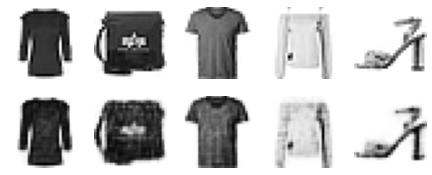

In [ ]:
def show_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

show_reconstructions(stacked_ae)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive
